# Breast Cancer cases across US Regions

In [1]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
df = pd.read_csv('test_clean.csv')
df.head()

,patient_id,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,Division,population,...,portion,quadrant,right,secondary,site,sites,specified,tail,unspecified,upper
0,573710,IN,467,54,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,Midwest,East North Central,5441.435484,...,0.0,0.434331,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.481817
1,593679,FL,337,52,C50912,Malignant neoplasm of unspecified site of left...,C787,South,South Atlantic,19613.820510,...,0.0,0.000000,0.00000,0.0,0.502001,0.0,0.0,0.0,0.409824,0.000000
2,184532,CA,917,61,C50911,Malignant neoplasm of unsp site of right femal...,C773,West,Pacific,43030.500000,...,0.0,0.000000,0.55114,0.0,0.505546,0.0,0.0,0.0,0.412718,0.000000
3,447383,CA,917,64,C50912,Malignant neoplasm of unspecified site of left...,C779,West,Pacific,43030.500000,...,0.0,0.000000,0.00000,0.0,0.502001,0.0,0.0,0.0,0.409824,0.000000
4,687972,CA,900,40,C50412,Malig neoplasm of upper-outer quadrant of left...,C779,West,Pacific,36054.117650,...,0.0,0.434331,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.481817


In [11]:
# Shape of the dataset

print('Shape of the dataset',df.shape)

Shape of the dataset (5792, 112)


***This Dataset has 5792 rows and 112 column***

In [10]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Columns: 112 entries, patient_id to upper
dtypes: float64(98), int64(6), object(8)
memory usage: 4.9+ MB


In [17]:
# Total Columns in Dataset

df.columns.to_list()

['patient_id',
 'patient_state',
 'patient_zip3',
 'patient_age',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'Region',
 'Division',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_hig

In [18]:
# Check for missing values

df.isnull().sum()

patient_id                      0
patient_state                   0
patient_zip3                    0
patient_age                     0
breast_cancer_diagnosis_code    0
                               ..
sites                           0
specified                       0
tail                            0
unspecified                     0
upper                           0
Length: 112, dtype: int64

In [19]:
# Description of the dataset

df.describe()

,patient_id,patient_zip3,patient_age,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,...,portion,quadrant,right,secondary,site,sites,specified,tail,unspecified,upper
count,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,...,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,549946.787983,570.217887,59.274862,20266.872152,1510.471786,40.575472,11.119250,12.919191,13.218348,12.841374,...,0.026609,0.124085,0.145435,0.001518,0.190291,0.054746,0.019474,0.004647,0.298141,0.111040
std,260988.833446,275.314510,13.076323,13694.738314,2883.409750,4.029852,1.478579,1.909698,3.294389,2.358636,...,0.127742,0.192314,0.217996,0.038476,0.239747,0.168442,0.121114,0.055737,0.287432,0.202678
min,100266.000000,101.000000,18.000000,829.515152,0.821739,20.600000,0.000000,6.314286,5.925000,1.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,320284.500000,329.000000,50.000000,8863.550000,161.925000,37.190476,10.160000,11.726471,10.996226,11.211818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,553042.000000,554.000000,59.000000,18711.016665,626.236667,40.640909,11.039216,12.923944,12.531646,12.404348,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.409824,0.000000
75%,778552.250000,836.000000,67.000000,28996.772730,1612.851111,43.085938,12.143396,13.904830,14.937500,14.037838,...,0.000000,0.381094,0.371848,0.000000,0.502001,0.000000,0.000000,0.000000,0.621724,0.000000
max,999890.000000,996.000000,91.000000,71374.131580,21172.000000,54.570000,16.481818,35.300000,62.100000,25.471429,...,0.670153,0.479657,0.551140,0.976751,0.637696,0.627284,0.772569,0.689025,0.751250,0.532100


***

In [ ]:
# 2. Target Understanding - Metastatic Cancer Risk 

print("Metastatic diagnosis breakdown:")
print(df['metastatic_cancer_diagnosis_code'].value_counts())
print("\nMetastatic rate by payer:", 
      df.groupby('payer_type')['metastatic_cancer_diagnosis_code'].value_counts(normalize=True).unstack().fillna(0))


Metastatic diagnosis breakdown:
metastatic_cancer_diagnosis_code
C773     3171
C7951     868
C779      331
C7981     204
C7800     187
C787      171
C7989     168
C799      117
C7931      97
C792       73
C771       70
C770       66
C7801      64
C778       39
C782       36
C7802      23
C7952      18
C786       14
C772       12
C7889      10
C785        9
C781        9
C7949       6
C7960       5
C7900       4
C7970       4
C7932       3
C7839       3
C7961       2
C7971       2
C7972       1
C7982       1
C7880       1
C774        1
C775        1
C7940       1
Name: count, dtype: int64

Metastatic rate by payer: metastatic_cancer_diagnosis_code      C770      C771      C772      C773  \
payer_type                                                                 
COMMERCIAL                        0.011747  0.014838  0.001546  0.593509   
MEDICAID                          0.008013  0.005609  0.004808  0.475962   
MEDICARE ADVANTAGE                0.013751  0.011459  0.000764  0.501910  

***

# 1. Insurance Distribution

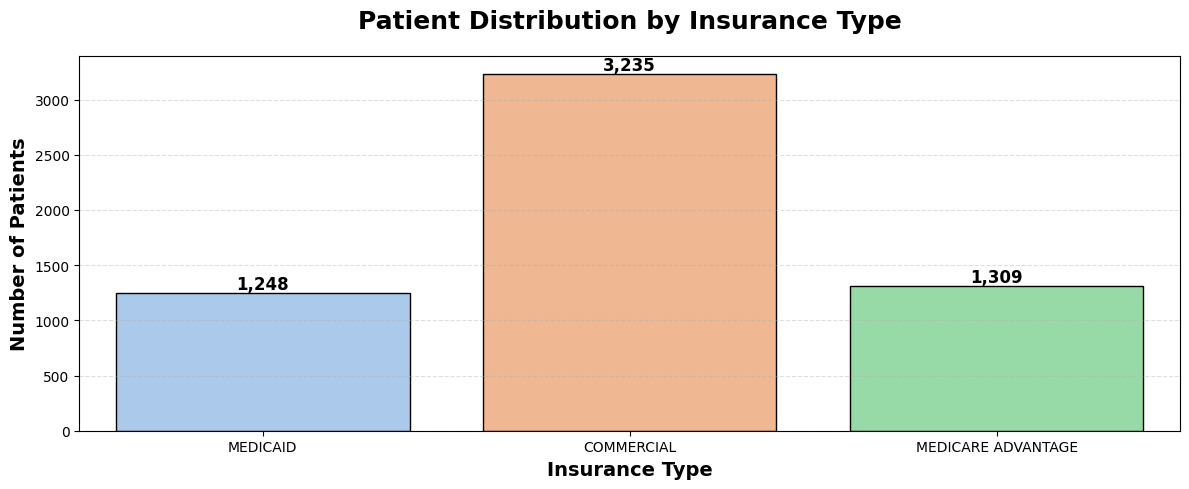

In [171]:

plt.figure(figsize=(12, 5))  


ax = sns.countplot(data=df, x='payer_type', hue= 'payer_type',
                   palette='pastel',  
                   edgecolor='black', linewidth=1)  


plt.title('Patient Distribution by Insurance Type', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Insurance Type', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')


for p in ax.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, 
             height,  
             f'{int(height):,}',
             ha='center', va='bottom',  
             fontsize=12, fontweight='bold')



plt.grid(axis='y', linestyle='--', alpha=0.4)  
plt.tight_layout()  
plt.show()



***Concluison :- COMMERCIAL patients represent the majority of cases, with MEDICARE ADVANTAGE and MEDICAID serving distinct but critical population segments.***

# 2. Age Distribution

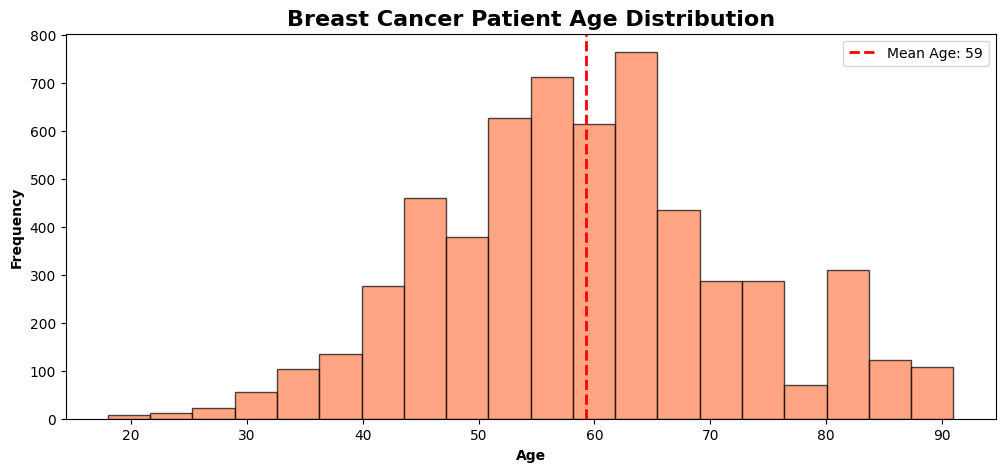

In [180]:
plt.figure(figsize=(12,5))

plt.hist(df['patient_age'], bins=20, edgecolor='black', color='coral', alpha=0.7)

mean_age = df['patient_age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth = 2, label=f'Mean Age: {mean_age:.0f}')

plt.title('Breast Cancer Patient Age Distribution', fontweight='bold', fontsize=16)
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.legend()
plt.show()

***Conclusion :- Breast cancer primarily affects women in their late 50s and early 60s, with standard screening programs targeting this age group.***

***Average diagnosis age: ~59 years***

***Most common range: 55-65 years***

# 3. Patients by Region

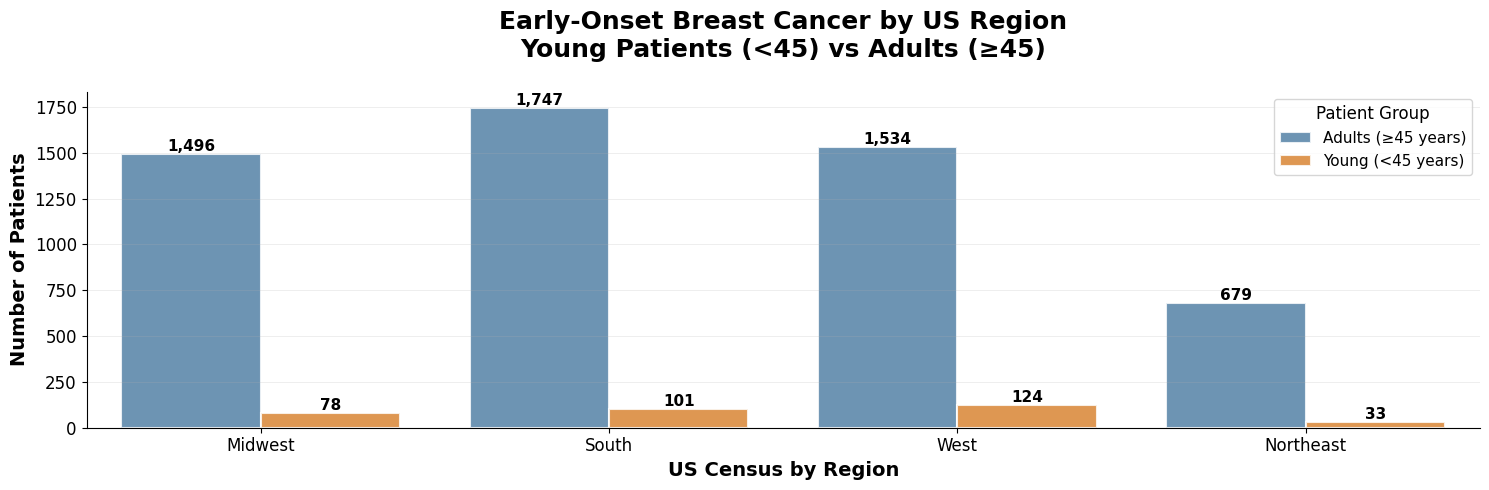

In [ ]:

plt.figure(figsize=(15, 5))

ax = sns.countplot(data=df, x='Region', hue='young_ind',
                   palette=['steelblue', '#F58518'], 
                   edgecolor='white', linewidth=1.5,
                   alpha=0.85)


plt.title('Early-Onset Breast Cancer by US Region\nYoung Patients (<45) vs Adults (≥45)', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('US Census by Region', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')


region_totals = df['Region'].value_counts()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        region_idx = int(p.get_x() + p.get_width() / 2)
        region_name = ax.get_xticklabels()[region_idx].get_text()
        plt.text(p.get_x() + p.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', 
                fontweight='bold', fontsize=11, color='black')


plt.legend(title='Patient Group', labels=['Adults (≥45 years)', 'Young (<45 years)'], fontsize=11, title_fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
sns.despine()
plt.tight_layout()
plt.show()




***Conclusion :- Breast cancer shows distinct age-based geographic patterns - South serves older patients while West faces higher early-onset burden,***
***requiring region-specific screening strategies.***

***

# 4. Patients by Division 

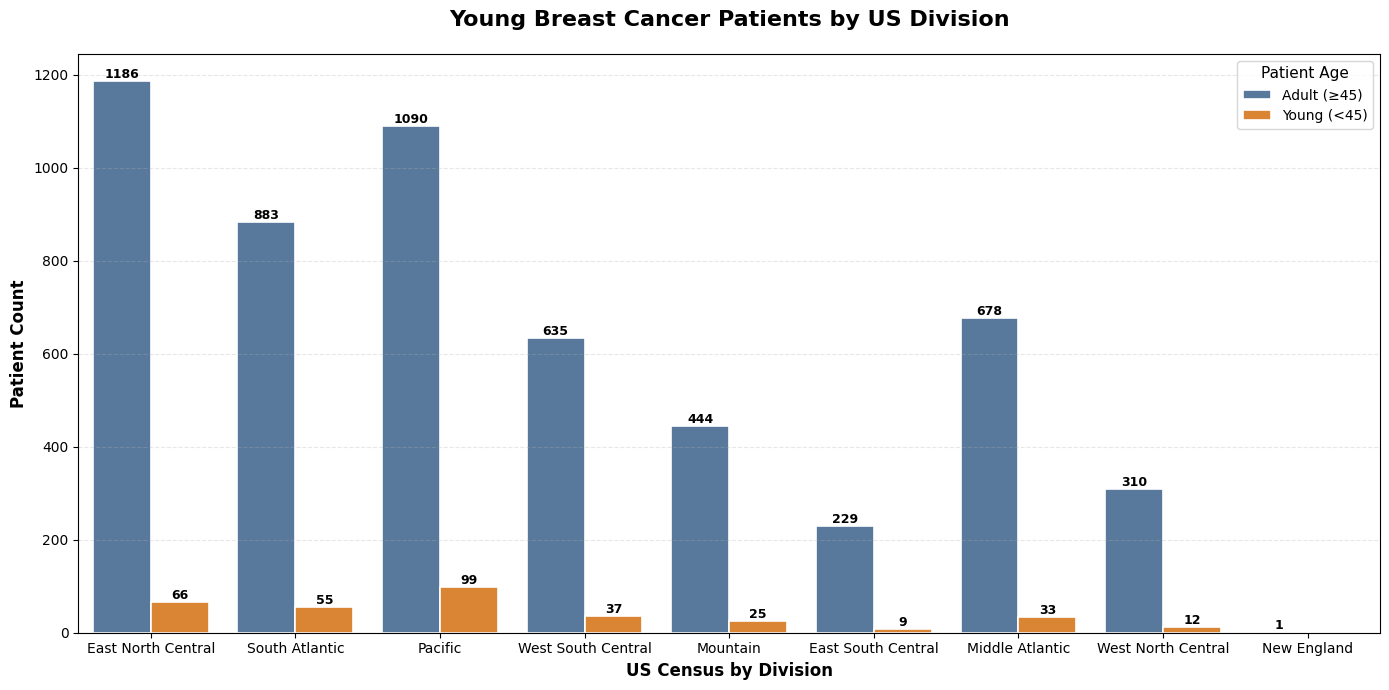

In [ ]:
plt.figure(figsize=(14, 7))


ax = sns.countplot(data=df, x='Division', hue='young_ind', 
                   palette=['#4C78A8', '#F58518'],  
                   edgecolor='white', linewidth=1.2)

plt.title('Young Breast Cancer Patients by US Division', 
          fontsize=16, fontweight='bold', pad=20)

plt.xlabel('US Census by Division', fontsize=12, fontweight='bold')
plt.ylabel('Patient Count', fontsize=12, fontweight='bold')


total_by_div = df['Division'].value_counts()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        div_idx = int(p.get_x() + p.get_width()/2)
        div_name = ax.get_xticklabels()[div_idx].get_text()
        plt.text(p.get_x() + p.get_width()/2 , height,
                f'{int(height)}', ha='center', va = 'bottom', fontsize=9, fontweight='bold')


plt.legend(title='Patient Age', labels=['Adult (≥45)', 'Young (<45)'], 
           title_fontsize=11, fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Conclusion:
This visualization breaks down young and adult patient counts by US divisions, revealing variations within regions. Divisions in the ***Pacific*** continue to show elevated numbers for ***Young Patient***, and ***East North Central*** continue to show elevated numbers for ***Adult Patient***.

***

# 5. Tumor site prevalence 

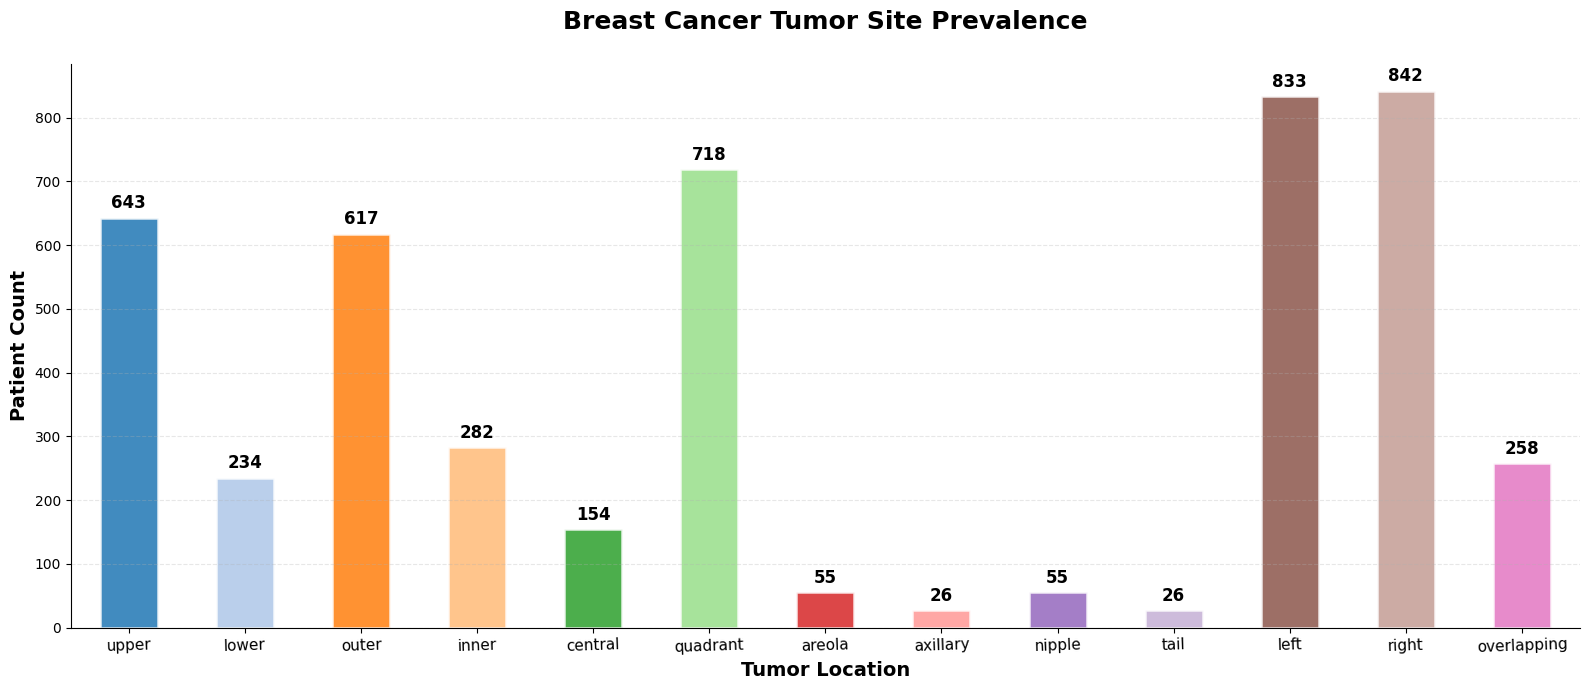

In [ ]:

plt.figure(figsize=(16, 7))


tumor_sites = [
    'upper', 'lower', 'outer', 'inner', 'central', 'quadrant', 'areola', 'axillary', 'nipple', 'tail','left', 'right', 'overlapping'
]


tumor_cols = []
for col in tumor_sites:
    if col in df.columns:
        tumor_cols.append(col)


color = sns.color_palette("tab20", len(tumor_cols))

bars = df[tumor_cols].sum().plot(
    kind='bar', 
    color = color,
    edgecolor='white', 
    linewidth=1.8,
    alpha=0.85
)


plt.title('Breast Cancer Tumor Site Prevalence', fontsize=18, fontweight='bold', pad=25)
plt.xlabel('Tumor Location', fontsize=14, fontweight='bold')
plt.ylabel('Patient Count', fontsize=14, fontweight='bold')


max_height = df[tumor_cols].sum().max()
for index, value in enumerate(df[tumor_cols].sum()):
    plt.text(index, value + max_height*0.01, 
             f'{int(value):,}', 
             ha='center', va='bottom', 
             fontweight='bold', fontsize=12)


plt.xticks(rotation = 2,fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')

sns.despine()
plt.tight_layout()
plt.show()





### Conclusion: Breast Cancer Tumor Site Prevalence
The bar chart illustrates the frequency of tumor locations in breast cancer cases. The ***'Right'*** quadrant is the most common site, followed by other locations, which can inform surgical and treatment planning.

***

# 6.Tumar Heatmap

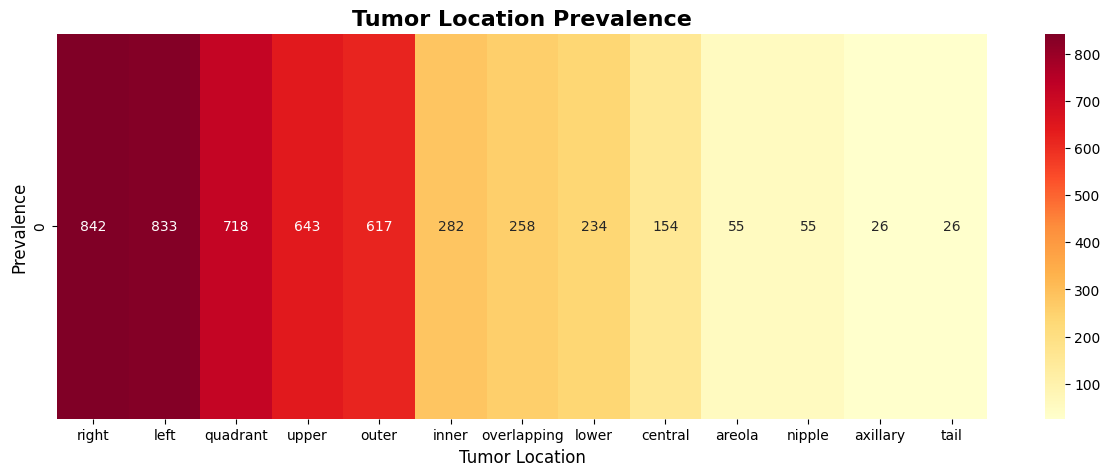

In [198]:
plt.figure(figsize=(15, 5)) 

tumor_cols = ['upper', 'lower', 'outer', 'inner', 'central', 'quadrant', 'areola', 'axillary', 'nipple', 'tail', 'left', 'right', 'overlapping']


counts_int = df[tumor_cols].sum().astype(int).sort_values(ascending=False)

sns.heatmap(counts_int.to_frame().T, annot=True, fmt='d', cmap='YlOrRd')

plt.title('Tumor Location Prevalence', fontweight='bold', fontsize=16)
plt.xlabel('Tumor Location', fontsize=12)
plt.ylabel('Prevalence', fontsize=12)


plt.show()


***Conclusion :- Upper quadrant tumors represent the primary clinical focus for screening and biopsy protocols, as they account for nearly half of all cases. Right-side tumors show slightly higher prevalence than left.***